In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv("students_placement.csv")
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [74]:
df.sample(5)

,cgpa,iq,profile_score,placed
39,6.57,108,71,1
46,7.32,97,54,1
15,7.88,91,59,1
284,7.06,93,44,1
100,8.35,98,71,1


In [75]:
df.shape

(300, 4)

In [76]:
df.describe()

,cgpa,iq,profile_score,placed
count,300.000000,300.000000,300.000000,300.000000
mean,6.812000,102.570000,60.043333,0.506667
std,0.971568,8.326034,14.282440,0.500791
min,4.600000,83.000000,23.000000,0.000000
25%,6.010000,96.000000,51.000000,0.000000
50%,6.840000,103.500000,60.000000,1.000000
75%,7.502500,109.000000,69.000000,1.000000
max,9.300000,121.000000,100.000000,1.000000


In [77]:
df.isnull().sum()

cgpa             0
iq               0
profile_score    0
placed           0
dtype: int64

In [78]:
df.isnull().sum().sum()

0

<AxesSubplot:>

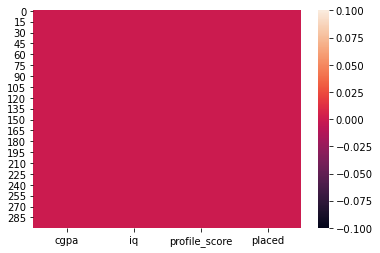

In [79]:
sns.heatmap(df.isnull())

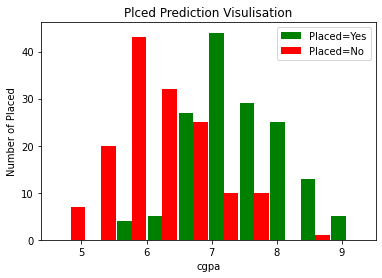

In [80]:
cgpa_0 = df[df['placed']==0].cgpa
cgpa_1 = df[df['placed']==1].cgpa
plt.xlabel("cgpa")
plt.ylabel("Number of Placed")
plt.title("Plced Prediction Visulisation")
plt.hist([cgpa_1, cgpa_0], rwidth=0.95, color=['green','red'],label=['Placed=Yes','Placed=No'])
plt.legend()

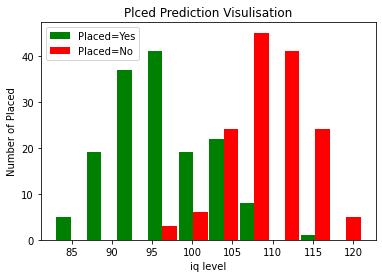

In [81]:
iq_0 = df[df['placed']==0].iq
iq_1 = df[df['placed']==1].iq
plt.xlabel("iq level")
plt.ylabel("Number of Placed")
plt.title("Plced Prediction Visulisation")
plt.hist([iq_1, iq_0], rwidth=0.95, color=['green','red'],label=['Placed=Yes','Placed=No'])
plt.legend()

array([[<AxesSubplot:title={'center':'cgpa'}>,
        <AxesSubplot:title={'center':'iq'}>],
       [<AxesSubplot:title={'center':'profile_score'}>,
        <AxesSubplot:title={'center':'placed'}>]], dtype=object)

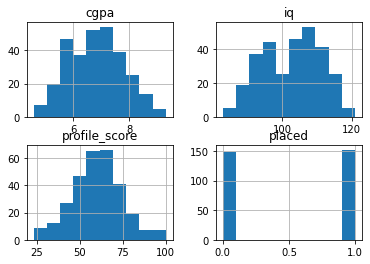

In [82]:
df.hist()

C:\Users\nikhatara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='iq', ylabel='Density'>

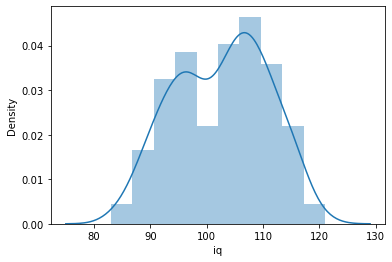

In [83]:
sns.distplot(df['iq'])

C:\Users\nikhatara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

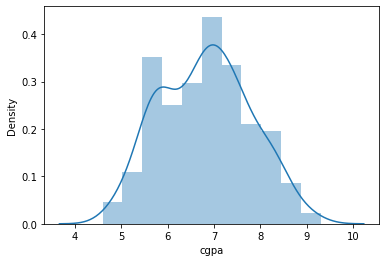

In [84]:
sns.distplot(df['cgpa'])

C:\Users\nikhatara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='profile_score', ylabel='Density'>

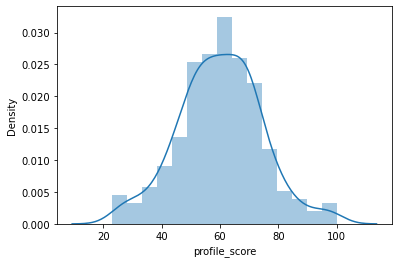

In [85]:
sns.distplot(df['profile_score'])

C:\Users\nikhatara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profile_score'>

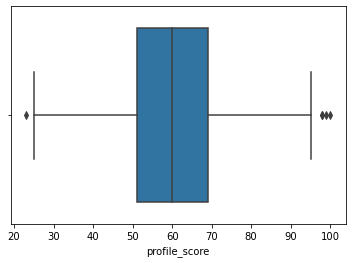

In [86]:
sns.boxplot(df['profile_score'])

C:\Users\nikhatara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='iq'>

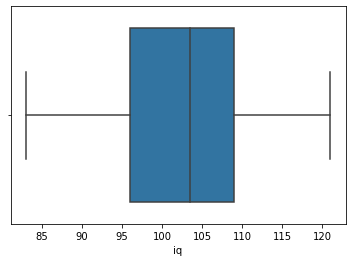

In [87]:
sns.boxplot(df['iq'])

In [88]:
df.reset_index(drop=True)

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0
...,...,...,...,...
295,6.44,107,54,0
296,6.09,108,52,0
297,7.68,101,70,1
298,7.00,90,28,1


In [89]:
df.head(1)

,cgpa,iq,profile_score,placed
0,5.97,106,61,0


In [90]:
X = df.drop(columns=['placed'],axis=1)
y = df['placed']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [92]:
X_train.shape

(240, 3)

In [93]:
X_test.shape

(60, 3)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [95]:
X_train_sc[:5]

array([[-0.99661291,  0.89706185,  0.52843859],
       [-1.71794342,  0.29668582,  0.52843859],
       [-0.36671867,  0.53683623,  0.1788651 ],
       [-1.54523048,  0.05653541,  1.57715906],
       [-1.60618799,  1.01713705,  1.01784148]])

In [96]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [97]:
y_pred = lr.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred)

0.85

In [99]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
y_pred1 = rfc.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred1)

0.8

In [102]:
import pickle
pickle.dump(lr,open('Students_Placed_Logistic_SC_new.pkl','wb'))

In [103]:
model = pickle.load(open('Students_Placed_Logistic_SC_new.pkl','rb'))

In [104]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [106]:
model.predict(pd.DataFrame([[5.13,114,54]],columns=['cgpa','iq','profile_score']))

array([0], dtype=int64)

In [ ]:
259	5.13	114	54	0
291	7.83	101	41	1